# Supportive Environment Factors for Discourse about Mental Health in Tech Workplaces

---

## Objective
"What changes can be identified in the data about attitudes to discussing 
personal mental health at the workplace?

In [1]:
import matplotlib.pyplot as plt
from FileTools import FileTools
from collections import Counter
from textwrap import wrap
import numpy as np

## Data acquisition, cleaning and feature engineering
[OSMI Mental Health in Tech Survey 2016]
(https://www.kaggle.com/osmi/mental-health-in-tech-2016)

In [2]:
# authenticate, download and load kaggle dataset
# see github.com/romstroller/FileTools
fTools = FileTools()
dfOrig = fTools.getKaggleSet( 'osmi', 'mental-health-in-tech-2016' )

Waiting for dataset download
Latest: mental-health-in-tech-2016.zip
Got DF from extracted dSet at:
 C:\Users\romstroller\PYC\mHealthAttFacts\data_or\mental-heath-in-tech-2016_20161114.csv


In [3]:
orShape = dfOrig.shape

# Drop null rows (null values cannot be interpolated in this dataset)
df = dfOrig.dropna( how='all' )

**Limit analysis to features that relate to objective**

In [4]:
feats = [
    f'Would you feel comfortable discussing a mental health disorder '
    f'with your coworkers?',
    f'Would you feel comfortable discussing a mental health disorder '
    f'with your direct supervisor(s)?',
    f'Would you have been willing to discuss a mental health issue '
    f'with your previous co-workers?',
    f'Would you have been willing to discuss a mental health issue '
    f'with your direct supervisor(s)?' ]

df = df[ feats ]
df.shape

(1433, 4)

In [5]:
# Drop responses with null for any of the above
df = df.dropna()
df.shape

(1015, 4)

In [6]:
#Listing the kinds of values provided in responses to each question
def printVals():
    for li in [ set( df[ ftr ] ) for ftr in feats ]: print( li, "\n" )


printVals()

{'Maybe', 'Yes', 'No'} 

{'Maybe', 'Yes', 'No'} 

{'No, at none of my previous employers', 'Yes, at all of my previous employers', 'Some of my previous employers'} 

{"I don't know", 'No, at none of my previous employers', 'Yes, at all of my previous employers', 'Some of my previous employers'} 



This analysis normalises results to a common "strength" in these ways:
- dropping "I don't know" as a null value 
- treating "Some..." responses as "Maybe" 
- shorten "No, at..." and "Yes, at..." responses to "No" and "Yes" respectively.

In [7]:
df = df.replace( "I don't know", np.nan ).dropna()
replacements = [
    [ "Some of my previous employers", "Maybe" ],
    [ "No, at none of my previous employers", "No" ],
    [ "Yes, at all of my previous employers", "Yes" ]
    ]

for o, n in replacements: df = df.replace( o, n )
printVals()
df.shape

{'Maybe', 'Yes', 'No'} 

{'Maybe', 'Yes', 'No'} 

{'Maybe', 'Yes', 'No'} 

{'Maybe', 'Yes', 'No'} 



(938, 4)

In [8]:
countDct = { }
# get response-counts from dataset
#   values are lists with [ response value, count, and count%total ]
#   sorted for consistent access in plotting function 
for ft in feats:
    countDct.update( { ft:
        sorted( list( item ) + [ item[ 1 ] / df.shape[ 0 ] ]
            for item in Counter( df[ ft ] ).items() ) } )

for k in countDct: print( k, '\n', countDct[ k ] )


Would you feel comfortable discussing a mental health disorder with your coworkers? 
 [['Maybe', 397, 0.4232409381663113], ['No', 306, 0.326226012793177], ['Yes', 235, 0.2505330490405117]]
Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)? 
 [['Maybe', 302, 0.32196162046908317], ['No', 259, 0.27611940298507465], ['Yes', 377, 0.40191897654584224]]
Would you have been willing to discuss a mental health issue with your previous co-workers? 
 [['Maybe', 554, 0.5906183368869936], ['No', 311, 0.3315565031982942], ['Yes', 73, 0.07782515991471216]]
Would you have been willing to discuss a mental health issue with your direct supervisor(s)? 
 [['Maybe', 516, 0.5501066098081023], ['No', 344, 0.36673773987206826], ['Yes', 78, 0.08315565031982942]]


##  Visualisation

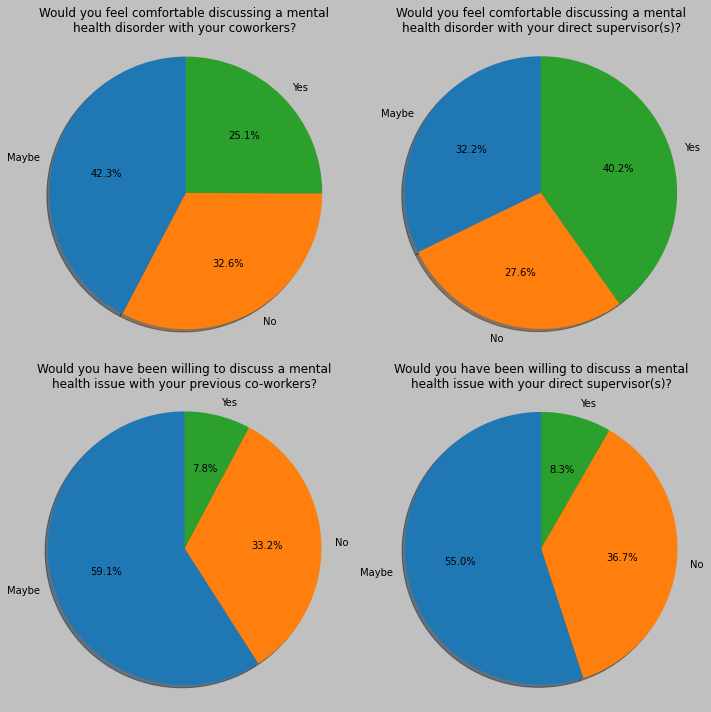

In [9]:
fig = plt.figure( figsize=(10, 10), facecolor="silver" )
for num, feat in enumerate( countDct, start=1 ):
    ax = fig.add_subplot( 2, 2, num )
    ax.pie(
        [ val[ 1 ] for val in countDct[ feat ] ],
        labels=[ val[ 0 ] for val in countDct[ feat ] ],
        autopct='%1.1f%%', shadow=True, startangle=90
        )
    ax.axis( 'equal' )
    ax.set_title( "\n".join( wrap( feat, 50 ) ) )
fig.tight_layout()

## Analysis

The following observations can be made:

- The number of people responding "no", that they did not feel comfortable 
discussing MHD with coworkers and supervisors, has remained relatively stable
from previous to current workplaces
- The number of people who were unsure whether the were comfortable (responded 
"maybe" to feeling comfortable in either scenario) significantly reduced
- The number responding "yes", that they felt comfortable with discussing MHD, 
significantly increased, with the greatest increase by far going to discussions
with their current supervisor.

**The significance of the role played by supervisors in creating a space for 
worker discourse about MHD is greatly increased at current workplaces. Workers 
report as feeling far more comfortable to discuss MHD with a supervisor than to 
remain silent or to discuss it with a coworker.**